## Enunciado

Disponemos de un dataset de las aplicaciones del **Playstore de Google** (*googleplaystore.csv*). El fichero original se puede descargar de:

https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications

pero tienes que utilizar el dataset que se te proporciona porque se han corregido algunas filas y se ha introducido algún cambio.

Queremos hacer un análisis exploratorio de los datos y su transformación en formatos más adecuados.


## Ejercicio 1: EDA

Haremos el análisis exploratorio de los datos (EDA), y eliminaremos las filas que no interesan.

1.1. Carga el dataset en un Dataframe de Pandas.

1.2. Muestra la información básica del dataframe, y las primeras 5 filas.

1.3. La primera columna se llama *unnamed*. Cambia el nombre por ID.

1.4. Elimina las columnas 'Type', 'Current Ver' y 'Android Ver'.

1.5. Renombra las columnas 'Content Rating' a 'Content_Rating' y 'Last Updated' a 'Last_Updated'.

1.6. ¿Cuántas apps hay?

1.7. Elimina las apps repetidas, quédate con la primera ocurrencia. ¿Cuántas apps hay ahora? Haz los cambios en el mismo dataframe.



In [1]:
import pandas as pd

df_app = pd.read_csv('googleplaystore.csv')
df_app.head()

,n,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7--Jan--18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15--Jan--18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1--Aug--18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8--Jun--18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20--Jun--18,1.1,4.4 and up


In [2]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   n               10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


In [3]:
 df_app.rename(columns={'n': "ID"}, inplace=True)
 df_app.columns

Index(['ID', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [4]:
df_app.drop(columns=['Type', 'Current Ver', 'Android Ver'], inplace=True)
df_app.columns

Index(['ID', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [5]:
 df_app.rename(columns={"Content Rating": "Content_Rating","Last Updated": "Last_Updated" }, inplace=True)
 df_app.columns

Index(['ID', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated'],
      dtype='object')

In [6]:
print(len(df_app))

df_app.drop_duplicates('App', keep='first', inplace=True)
print(len(df_app))

10840
9659


## Ejercicio 2: Clean y data wrangling

Continuaremos con la limipieza de datos. Habrás visto que columnas que supuestamente tienen que ser numéricas no lo son todavía: *Size*, *Installs* y *Price*. Transformaremos todas estas columnas a numéricas.

2.1. Visualiza otra vez la información del dataframe, donde se pone de manifiesto el tipo de datos de las columnas.

2.2. *Rating* es correcte (*float64*). Por tanto puedes calcular el valor medio de '*Rating*', con dos decimales. Muestra el resultado por pantalla.

2.3. Transforma las columnas *Size*, *Installs* y *Price* a numérico. Como resultado obtén el mismo dataframe con las columnas limpiadas.




In [7]:
df_app.head()

,ID,App,Category,Rating,Reviews,Size,Installs,Price,Content_Rating,Genres,Last_Updated
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,7--Jan--18
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15--Jan--18
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,1--Aug--18
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,8--Jun--18
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,20--Jun--18


In [8]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content_Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last_Updated    9659 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 905.5+ KB


In [9]:
# calcular media con dos decimales
print(round(df_app['Rating'].mean(),2))


4.17


In [10]:
#detectar si hay cosas que no son numeros
regex = r'[^0-9]'
print(df_app[df_app['Size'].str.contains(regex, na=False)])

          ID                                                App  \
0          0     Photo Editor & Candy Camera & Grid & ScrapBook   
1          1                                Coloring book moana   
2          2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3          3                              Sketch - Draw & Paint   
4          4              Pixel Draw - Number Art Coloring Book   
...      ...                                                ...   
10835  10836                                   Sya9a Maroc - FR   
10836  10837                   Fr. Mike Schmitz Audio Teachings   
10837  10838                             Parkinson Exercices FR   
10838  10839                      The SCP Foundation DB fr nn5n   
10839  10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                  Category  Rating  Reviews                Size     Installs  \
0           ART_AND_DESIGN     4.1      159                 19M      10,000+   
1           ART_AND_DESIGN     3.9 

In [11]:
# Limpieza del sizes
df_app['Size'] = df_app['Size'].str.replace('M','000000')
df_app['Size'] = df_app['Size'].str.replace('k','000')
df_app['Size'] = df_app['Size'].str.replace('.','')
df_app['Size'] = df_app['Size'].str.replace("Varies with device","0")




In [12]:
# Limpieza installs
df_app['Installs'] = df_app['Installs'].str.replace('+','')
df_app['Installs'] = df_app['Installs'].str.replace(',','')

#detectar si hay cosas que no son numeros
regex = r'[^0-9]'
print(df_app[df_app['Installs'].str.contains(regex, na=False)])



Empty DataFrame
Columns: [ID, App, Category, Rating, Reviews, Size, Installs, Price, Content_Rating, Genres, Last_Updated]
Index: []


In [13]:
# Limpieza Price
df_app['Price'] = df_app['Price'].str.replace('$','')

#detectar si hay cosas que no son numeros
regex = r'[^0-9 | ^.]'
print(df_app[df_app['Price'].str.contains(regex, na=False)])

Empty DataFrame
Columns: [ID, App, Category, Rating, Reviews, Size, Installs, Price, Content_Rating, Genres, Last_Updated]
Index: []


In [14]:
# las convertimos a numero
df_app['Size'] = pd.to_numeric(df_app['Size'])
df_app['Installs'] = pd.to_numeric(df_app['Installs'])
df_app['Price'] = pd.to_numeric(df_app['Price'])

df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            9659 non-null   int64  
 6   Installs        9659 non-null   int64  
 7   Price           9659 non-null   float64
 8   Content_Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last_Updated    9659 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 905.5+ KB


## Ejercicio 3: columna datetime, funciones

3.1. Convierte *Last_Updated* a format datetime. Muestra las 5 primeras filas para comprobar que el resultado es correcto.

Tienes que hacer varias comprovaciones previas



In [15]:
# las convertimos a numero
df_app['Last_Updated'] = df_app['Last_Updated'].str.replace('--','-')
df_app['Last_Updated'] = pd.to_datetime(df_app['Last_Updated'])
df_app.head()

<ipython-input-15-2acedd26059f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_app['Last_Updated'] = pd.to_datetime(df_app['Last_Updated'])


,ID,App,Category,Rating,Reviews,Size,Installs,Price,Content_Rating,Genres,Last_Updated
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,0.0,Everyone,Art & Design,2018-01-07
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000,5000000,0.0,Everyone,Art & Design,2018-08-01
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,0.0,Teen,Art & Design,2018-06-08
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000,100000,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [16]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10839
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   object        
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   int64         
 5   Size            9659 non-null   int64         
 6   Installs        9659 non-null   int64         
 7   Price           9659 non-null   float64       
 8   Content_Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last_Updated    9659 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 905.5+ KB


## Ejercicio 4: filtrar datos

Realiza los siguientes ejercicios:

4.1. Busca todas las apps que contengan '*fc barcelona*' (ignorando mayúsculas y minúsculas), e imprime los resultados, ordenados por fecha, con el formato:
   * *({ID}) {nom_app}: {Rating}, {Last_Updated}*

Por ejemplo: *(10239) FC Barcelona Fantasy Manager: Real football mobile: 4.4, 02/10/2017*
Debes usar el str_contains

4.2. Muestra el número de apps que tienen un Rating entre 0 y 2.9 (incluido). Primero muestra el valor por pantalla, después haz un *assert* de manera que la aserción sea correcta.

4.3. ¿Qué tanto por ciento de aplicaciones tienen un rating entre 0 y 2.9? Muéstralo con el formato "*Porcentaje de apps inferior a 2.9: xxx %*", con dos decimales.

4.4. Eliminar todas las aplicaciones que tienen una puntuación entre 0 y 2.9 y las pones en el dataframe *df_good* (manteniendo el dataframe original intacto). ¿Cuántas tenemos ahora?


In [17]:
df_fcb = df_app[df_app['App'].str.contains('fc barcelona', case=False)].sort_values(by='Last_Updated')
df_fcb['Last_Updated'] = df_fcb['Last_Updated'].dt.strftime('%d/%m/%Y')
for index, row in df_fcb.iterrows():
  print(f"{row['ID']} {row['App']}: {row['Rating']}, {row['Last_Updated']}")


10239 FC Barcelona Fantasy Manager: Real football mobile: 4.4, 02/10/2017
10247 FC BARCELONA EVENTS: 4.3, 22/04/2018
10241 FC Barcelona Official Keyboard: 4.7, 17/05/2018
10251 FCB Connect - FC Barcelona: 4.5, 07/06/2018
10266 Noticias FC Barcelona: 5.0, 15/06/2018
5434 FC Barcelona Official App: 4.6, 26/07/2018
10245 Barca News - FC Barcelona, World Foot & Transfers: 4.8, 04/08/2018


In [18]:
len(df_app[df_app['Rating']< 3])
df_app[df_app['Rating']< 3].shape[0]
por_bad=round(((len(df_app[df_app['Rating']< 3])/len(df_app))*100),2)

print(f"El porcentaje de apps malas es de {por_bad} %")

El porcentaje de apps malas es de 2.89 %


In [19]:
print(f"El porcentaje de apps buenas es de {100-por_bad} %")

El porcentaje de apps buenas es de 97.11 %


In [20]:
df_appGood = df_app[df_app['Rating']> 3]
df_appGood.head()

,ID,App,Category,Rating,Reviews,Size,Installs,Price,Content_Rating,Genres,Last_Updated
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,0.0,Everyone,Art & Design,2018-01-07
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000,5000000,0.0,Everyone,Art & Design,2018-08-01
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,0.0,Teen,Art & Design,2018-06-08
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000,100000,0.0,Everyone,Art & Design;Creativity,2018-06-20


## Ejercicio 5: Lista

Realiza los siguientes ejercicios:

5.1. Crea una lista que se llame *best_apps* con las aplicaciones que valgan 3 o más dólares, y que tengan un rating máyor o igual que 4.5. El contenido de la lista sólo es el nombre de la app.

5.2. ¿Qué longitud tiene esta lista? No lo muestres por pantalla, haz un *assert* con el valor de la longitud que te ha salido.

5.3. Ordena la lista por longitud de caracteres (de menos a más) y muestra las 10 primeras aplicaciones. Aplícalo sobre la misma lista.

5.4. A partir de la lista *best_apps*, crea una nueva lista (*best_apps_clean*) con *comprehension list* donde habrás eliminado todos los caracteres que no sean alfanuméricos (comillas dobles, comillas simples). También hay caracteres gráficos como diamantes, estrellas, etc. Puedes tratar estos caracteres especiales igual que los caracteres normales. Elimina tambié todo lo que esté entre paréntesis. La eliminación la tienes que hacer con una expresión regular. Muestra las 30 primeras filas.



In [21]:
best_apps = df_appGood[(df_appGood['Price'] >= 3) & (df_appGood['Rating'] >= 4.5)]['App']
#best_apps = df_fcb[(df_fcb['Price'] >= 3) & (df_fcb['Rating'] >= 4.5)]['App']
print(best_apps)

assert len(best_apps)==109,'No te ha dado el resultado correcto'

234      TurboScan: scan documents and receipts in PDF
235                     Tiny Scanner Pro: PDF Doc Scan
851                                Sago Mini Hat Maker
852             Fuzzy Numbers: Pre-K Number Foundation
853                                    Toca Life: City
                             ...                      
9647                                        The EO Bar
9848                     Learn Italian with MosaLingua
10072                                 ExDialer PRO Key
10450                   Police Field Interview FI Card
10530               Kernel Manager for Franco Kernel ✨
Name: App, Length: 109, dtype: object


In [22]:
best_apps = best_apps.to_list()
best_apps.sort(key=len)

In [23]:
best_apps[:-10]



['BW-Go',
 'go41cx',
 'myGrow',
 'Minecraft',
 'Pedi STAT',
 'Pocket AC',
 'The EO Bar',
 'QR Code Pro',
 'ASCCP Mobile',
 'Weather Live',
 'Anna.K Tarot',
 'Day R Premium',
 'PAC-MAN CE DX',
 'My Talking Pet',
 'Chess and Mate',
 'Breathing Zone',
 'DRAGON QUEST V',
 'Lunar Calendar',
 'BatControl Pro',
 'Battery HD Pro',
 'Toca Life: City',
 'EMT Review Plus',
 'FINAL FANTASY V',
 'BZ Reminder PRO',
 'DRAGON QUEST IV',
 'DRAGON QUEST II',
 "Dr. Seuss's ABC",
 'Sago Mini Babies',
 'Weather Live Pro',
 'ExDialer PRO Key',
 'Meditation Studio',
 'Monument Valley 2',
 'The Legacy (Full)',
 'DRAGON QUEST VIII',
 'The Room: Old Sins',
 'Star Wars ™: DIRTY',
 "Traps n' Gemstones",
 'Battleheart Legacy',
 'Sago Mini Hat Maker',
 'Toca Life: Hospital',
 'CM Launcher 3D Pro💎',
 'AC DC Power Monitor',
 'DraStic DS Emulator',
 'Farming Simulator 18',
 'Hospitalist Handbook',
 'Navi Radiography Pro',
 'Smart Launcher Pro 3',
 'Weather Forecast Pro',
 'Carrier Landings Pro',
 'Acupuncture Assistan

In [24]:
best_apps

['BW-Go',
 'go41cx',
 'myGrow',
 'Minecraft',
 'Pedi STAT',
 'Pocket AC',
 'The EO Bar',
 'QR Code Pro',
 'ASCCP Mobile',
 'Weather Live',
 'Anna.K Tarot',
 'Day R Premium',
 'PAC-MAN CE DX',
 'My Talking Pet',
 'Chess and Mate',
 'Breathing Zone',
 'DRAGON QUEST V',
 'Lunar Calendar',
 'BatControl Pro',
 'Battery HD Pro',
 'Toca Life: City',
 'EMT Review Plus',
 'FINAL FANTASY V',
 'BZ Reminder PRO',
 'DRAGON QUEST IV',
 'DRAGON QUEST II',
 "Dr. Seuss's ABC",
 'Sago Mini Babies',
 'Weather Live Pro',
 'ExDialer PRO Key',
 'Meditation Studio',
 'Monument Valley 2',
 'The Legacy (Full)',
 'DRAGON QUEST VIII',
 'The Room: Old Sins',
 'Star Wars ™: DIRTY',
 "Traps n' Gemstones",
 'Battleheart Legacy',
 'Sago Mini Hat Maker',
 'Toca Life: Hospital',
 'CM Launcher 3D Pro💎',
 'AC DC Power Monitor',
 'DraStic DS Emulator',
 'Farming Simulator 18',
 'Hospitalist Handbook',
 'Navi Radiography Pro',
 'Smart Launcher Pro 3',
 'Weather Forecast Pro',
 'Carrier Landings Pro',
 'Acupuncture Assistan

In [25]:
#detectar si hay cosas que no son numeros
import re
regex = '\(*?\))'
best_apps_clean = [re.sub(r'\(.*?\)', '', ele) for ele in best_apps]
best_apps_clean = [re.sub('[^0-9a-zA-Z]+', '', ele) for ele in best_apps_clean]

In [26]:
best_apps_clean

['BWGo',
 'go41cx',
 'myGrow',
 'Minecraft',
 'PediSTAT',
 'PocketAC',
 'TheEOBar',
 'QRCodePro',
 'ASCCPMobile',
 'WeatherLive',
 'AnnaKTarot',
 'DayRPremium',
 'PACMANCEDX',
 'MyTalkingPet',
 'ChessandMate',
 'BreathingZone',
 'DRAGONQUESTV',
 'LunarCalendar',
 'BatControlPro',
 'BatteryHDPro',
 'TocaLifeCity',
 'EMTReviewPlus',
 'FINALFANTASYV',
 'BZReminderPRO',
 'DRAGONQUESTIV',
 'DRAGONQUESTII',
 'DrSeusssABC',
 'SagoMiniBabies',
 'WeatherLivePro',
 'ExDialerPROKey',
 'MeditationStudio',
 'MonumentValley2',
 'TheLegacy',
 'DRAGONQUESTVIII',
 'TheRoomOldSins',
 'StarWarsDIRTY',
 'TrapsnGemstones',
 'BattleheartLegacy',
 'SagoMiniHatMaker',
 'TocaLifeHospital',
 'CMLauncher3DPro',
 'ACDCPowerMonitor',
 'DraSticDSEmulator',
 'FarmingSimulator18',
 'HospitalistHandbook',
 'NaviRadiographyPro',
 'SmartLauncherPro3',
 'WeatherForecastPro',
 'CarrierLandingsPro',
 'AcupunctureAssistant',
 'HeyAJItsBedtime',
 'BusinessCalendarPro',
 'TheHouseofDaVinci',
 'JournalClubMedicine',
 'HeyAJIts

## Ejercicio 6: Agrupamiento de datos

Crea un nuevo dataframe (*my_df*) con los siguientes requisitos:

   * Rating superior a 4
   * reviews >= 5000
   * tamany inferior a 10000000
   * instalaciones >= 50000
   * Content Rating: Everyone

6.1. ¿Qué tamaño tiene? Muestra los 10 primeros valores.

6.2. Crea una lista de diccionarios (*my_dict*, utiliza *dict comprehension*) a partir del anterior dataframe *my_df*, de manera que el primer campo sea el nombre de la aplicación (app), y el segundo campo el género (*Genre*).

6.3. A partir del dataframe my_df, haz un agrupamiento (group by) del número de apps por categoría (*my_df_gb*).

6.4. Elimina del dataframe resultante los géneros que tienen menos de 20 apps.

6.5. Muestra el dataframe resultante por pantalla (continua siendo el dataframe *my_df_gb*).



In [37]:
df_appTop = df_app[(df_app['Rating']>4) & (df_app['Reviews']>=5000) & (df_app['Size']<10000000) & (df_app['Installs']>=50000) & (df_app['Content_Rating']=='Everyone')]

In [39]:
len(df_appTop)
df_appTop.head(10)

,ID,App,Category,Rating,Reviews,Size,Installs,Price,Content_Rating,Genres,Last_Updated
37,37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,0,5000000,0.0,Everyone,Art & Design,2018-07-14
42,42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,0,10000000,0.0,Everyone,Art & Design,2018-07-30
52,52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,0,1000000,0.0,Everyone,Auto & Vehicles,2018-07-30
67,67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,0,5000000,0.0,Everyone,Auto & Vehicles,2018-07-30
85,85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,0,1000000,0.0,Everyone,Auto & Vehicles,2018-08-04
88,88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,0,1000000,0.0,Everyone,Auto & Vehicles,2018-08-03
89,89,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,0,100000,0.0,Everyone,Auto & Vehicles,2018-05-10
92,92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,0,1000000,0.0,Everyone,Auto & Vehicles,2018-08-02
107,107,Ulta Beauty,BEAUTY,4.7,42050,0,1000000,0.0,Everyone,Beauty,2018-06-05
109,109,Selfie Camera,BEAUTY,4.2,17934,0,1000000,0.0,Everyone,Beauty,2017-09-12


In [53]:
list_dicc = []

for ind, row in df_appTop.iterrows():
  list_dicc.append({"app":row['App'], "genres":row['Genres']})

print(list_dicc)

[{'app': 'Floor Plan Creator', 'genres': 'Art & Design'}, {'app': 'Textgram - write on photos', 'genres': 'Art & Design'}, {'app': 'Used Cars and Trucks for Sale', 'genres': 'Auto & Vehicles'}, {'app': 'Ulysse Speedometer', 'genres': 'Auto & Vehicles'}, {'app': 'CarMax – Cars for Sale: Search Used Car Inventory', 'genres': 'Auto & Vehicles'}, {'app': 'AutoScout24 Switzerland – Find your new car', 'genres': 'Auto & Vehicles'}, {'app': 'Zona Azul Digital Fácil SP CET - OFFICIAL São Paulo', 'genres': 'Auto & Vehicles'}, {'app': 'Fuelio: Gas log & costs', 'genres': 'Auto & Vehicles'}, {'app': 'Ulta Beauty', 'genres': 'Beauty'}, {'app': 'Selfie Camera', 'genres': 'Beauty'}, {'app': 'Wikipedia', 'genres': 'Books & Reference'}, {'app': 'Cool Reader', 'genres': 'Books & Reference'}, {'app': 'Dictionary - Merriam-Webster', 'genres': 'Books & Reference'}, {'app': 'FBReader: Favorite Book Reader', 'genres': 'Books & Reference'}, {'app': 'NOOK App for NOOK Devices', 'genres': 'Books & Reference'},

In [54]:
list_dicc = [{"app":row['App'], "genres":row['Genres']} for ind,row in df_appTop.iterrows()]


In [64]:
df_app_Top = df_appTop.groupby(['Category'])['Category'].count()
df_app_Top = df_app_Top[df_app_Top>=20]
print(df_app_Top)

Category
BUSINESS              24
COMMUNICATION         51
EDUCATION             21
FAMILY                28
FINANCE               28
GAME                  41
HEALTH_AND_FITNESS    40
PHOTOGRAPHY           50
PRODUCTIVITY          60
SPORTS                23
TOOLS                 78
TRAVEL_AND_LOCAL      32
Name: Category, dtype: int64


## Ejercicio 7: Representación gráfica

Vamos a representar gráficamente el número de apps que tiene cada género. Puedes aplicar los cambios en *my_df_gb*:

   * Renombra una de las columnas a Count.
   * Nos quedaremos con un dataframe de una sola columna, Genres y Count. Puedes eliminar las otras columnas.

7.1. Representa en un diagrama de barras el total de aplicacions que al final han quedado por cada género. Para representar los datos tenemos varias alternativas. Una posibilidad es convertir los datos del dataframe en dos listas, una para el eje de las x y la otra para el eje de las y.

7.2. Representa la misma información en un diagrama de sectores circulares.




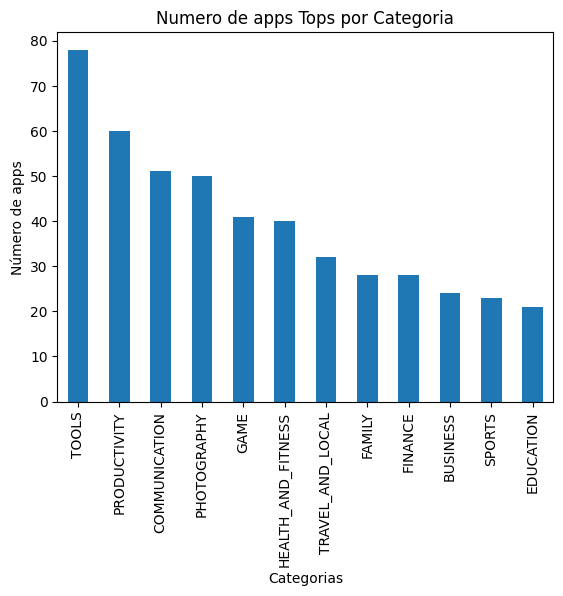

In [72]:
import matplotlib.pyplot as plt

df_app_Top.sort_values(ascending=False).plot(kind='bar')
plt.title('Numero de apps Tops por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Número de apps')
plt.show()

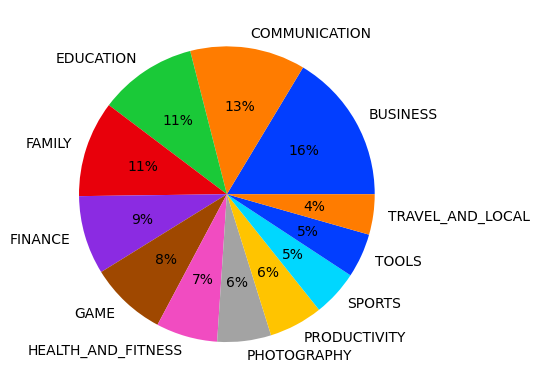

In [88]:
import seaborn as sns
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:11]
plt.pie(df_app_Top.sort_values(ascending=False),autopct='%1.0f%%', colors = colors, labels=df_app_Top.index)
plt.show()
